<a href="https://colab.research.google.com/github/nirmalaJ21/WeatweatherChangesT1/blob/main/Weather_Changes_Over_Time_(Consuming_APIs)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [ ]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

## Question 1: Geocoding A Location
Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [ ]:
# write your solution here
def geocode_location(city, country):
    url = f'https://geocode.xyz/{city}%20{country}'
    r = requests.get(url, params={'json': 1})\
                .json()
    return (float(r['latt']), float(r['longt']))

In [ ]:
city, country = ('london', 'united kingdom')
geocode_location(city, country)

(51.51419, -0.11533)

## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format


Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range

In [ ]:
# helper function for 15-day date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }

In [ ]:
# write your solution here
def get_api_response(latitude, longitude, birthday):
    url = "https://archive-api.open-meteo.com/v1/archive"

    date_range = get_date_range(birthday)

    r = requests.get(url,
                     params={'latitude': latitude,
                             'longitude': longitude,
                             'start_date': date_range['start_date'],
                             'end_date': date_range['end_date'],
                             'daily': ['temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','precipitation_sum'],
                             'timezone': 'auto',
                             'temperature_unit': 'fahrenheit',
                             'precipitation_unit': 'inch'
                            })\
                .json()
    return r

In [ ]:
city = "london"
country = "UK"
birthday = date(1983,12,28)
latitude, longitude = geocode_location(city, country)
get_api_response(latitude, longitude, birthday)

{'latitude': 51.5,
 'longitude': -0.099990845,
 'generationtime_ms': 19.194960594177246,
 'utc_offset_seconds': 3600,
 'timezone': 'Europe/London',
 'timezone_abbreviation': 'BST',
 'elevation': 26.0,
 'daily_units': {'time': 'iso8601',
  'temperature_2m_max': '°F',
  'temperature_2m_min': '°F',
  'apparent_temperature_max': '°F',
  'apparent_temperature_min': '°F',
  'precipitation_sum': 'inch'},
 'daily': {'time': ['1983-12-21',
   '1983-12-22',
   '1983-12-23',
   '1983-12-24',
   '1983-12-25',
   '1983-12-26',
   '1983-12-27',
   '1983-12-28',
   '1983-12-29',
   '1983-12-30',
   '1983-12-31',
   '1984-01-01',
   '1984-01-02',
   '1984-01-03',
   '1984-01-04'],
  'temperature_2m_max': [48.2,
   51.0,
   52.0,
   56.3,
   52.8,
   48.5,
   52.8,
   52.2,
   47.2,
   45.5,
   45.7,
   50.5,
   51.1,
   51.1,
   42.0],
  'temperature_2m_min': [42.7,
   41.9,
   44.7,
   45.0,
   48.4,
   38.8,
   39.5,
   45.6,
   41.4,
   34.5,
   33.6,
   44.8,
   37.6,
   36.7,
   31.7],
  'apparen

In [ ]:
def get_all_response_objects(start_year, end_year, birthday):
  responses = []
  for year in range(start_year,end_year):
    #print(year)
    request_date = date(year,birthday.month,birthday.day)
    #print(request_date)
    r = get_api_response(latitude, longitude, request_date)
    #print(r)
    responses.append(r)
  return responses

In [ ]:
responses = get_all_response_objects(1960,2022, birthday)
len(responses)

62

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [ ]:
# write your solution here
def get_all_response_objects(latitude, longitude, birthday):
    responses = []
    for year in range(1960, 2023):
        request_date = date(year, birthday.month, birthday.day)
        response = get_api_response(latitude, longitude, request_date)
        responses.append(response)

    return responses

In [ ]:
responses = get_all_response_objects(51.51413, -0.11534, date(2000, 12, 1))

In [ ]:
responses

[{'latitude': 51.5,
  'longitude': -0.099990845,
  'generationtime_ms': 1.4719963073730469,
  'utc_offset_seconds': 3600,
  'timezone': 'Europe/London',
  'timezone_abbreviation': 'BST',
  'elevation': 30.0,
  'daily_units': {'time': 'iso8601',
   'temperature_2m_max': '°F',
   'temperature_2m_min': '°F',
   'apparent_temperature_max': '°F',
   'apparent_temperature_min': '°F',
   'precipitation_sum': 'inch'},
  'daily': {'time': ['1960-11-24',
    '1960-11-25',
    '1960-11-26',
    '1960-11-27',
    '1960-11-28',
    '1960-11-29',
    '1960-11-30',
    '1960-12-01',
    '1960-12-02',
    '1960-12-03',
    '1960-12-04',
    '1960-12-05',
    '1960-12-06',
    '1960-12-07',
    '1960-12-08'],
   'temperature_2m_max': [54.4,
    55.0,
    54.4,
    50.4,
    43.0,
    50.1,
    52.2,
    53.3,
    48.0,
    55.0,
    53.4,
    46.0,
    44.0,
    42.8,
    40.5],
   'temperature_2m_min': [46.4,
    45.5,
    49.6,
    40.5,
    29.0,
    36.5,
    48.9,
    47.7,
    41.5,
    41.4,
   

### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


In [ ]:
# write your solution here
def parse_json_response(responses):
    df = pd.DataFrame(responses)
    df = df.join(pd.json_normalize(df['daily']))\
           .drop(columns=['daily'])

    # Get average of measurements
    measures = ['temperature_2m_max', 'temperature_2m_min',
                'apparent_temperature_max', 'apparent_temperature_min',
                'precipitation_sum']

    for col in measures:
        df[f"{col}_mean"] = df[col].apply(np.mean)

    # add year column
    df['year'] = df['time'].apply(lambda l: l[0][:4])

    return df[['year'] + [measure + '_mean' for measure in measures]]

In [ ]:
df = parse_json_response(responses)

### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [ ]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [ ]:
# write your solution here
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()

    latitude, longitude = geocode_location(*location)

    responses = get_all_response_objects(latitude, longitude, birthday)

    return parse_json_response(responses)

Run your function and set it equal to `df`:

In [ ]:
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY): 12/28/1983
Enter the city you were born in: detroit
Enter the country you were born in: us


,year,temperature_2m_max_mean,temperature_2m_min_mean,apparent_temperature_max_mean,apparent_temperature_min_mean,precipitation_sum_mean
0,1960,23.966667,10.320000,15.306667,0.560000,0.024533
1,1961,26.480000,15.006667,17.466667,4.866667,0.026667
2,1962,24.613333,6.586667,15.646667,-3.300000,0.018400
3,1963,28.053333,12.460000,20.106667,2.746667,0.017467
4,1964,37.533333,28.766667,30.886667,20.506667,0.135000


## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` and write a short summary of your results.

In [ ]:
df.columns


Index(['year', 'temperature_2m_max_mean', 'temperature_2m_min_mean',
       'apparent_temperature_max_mean', 'apparent_temperature_min_mean',
       'precipitation_sum_mean'],
      dtype='object')

In [ ]:
df_melted = df.melt(id_vars='year',
                    value_vars=['temperature_2m_max_mean', 'temperature_2m_min_mean',
                                'apparent_temperature_max_mean', 'apparent_temperature_min_mean',
                                'precipitation_sum_mean'],
                    var_name='measurement'
                   )

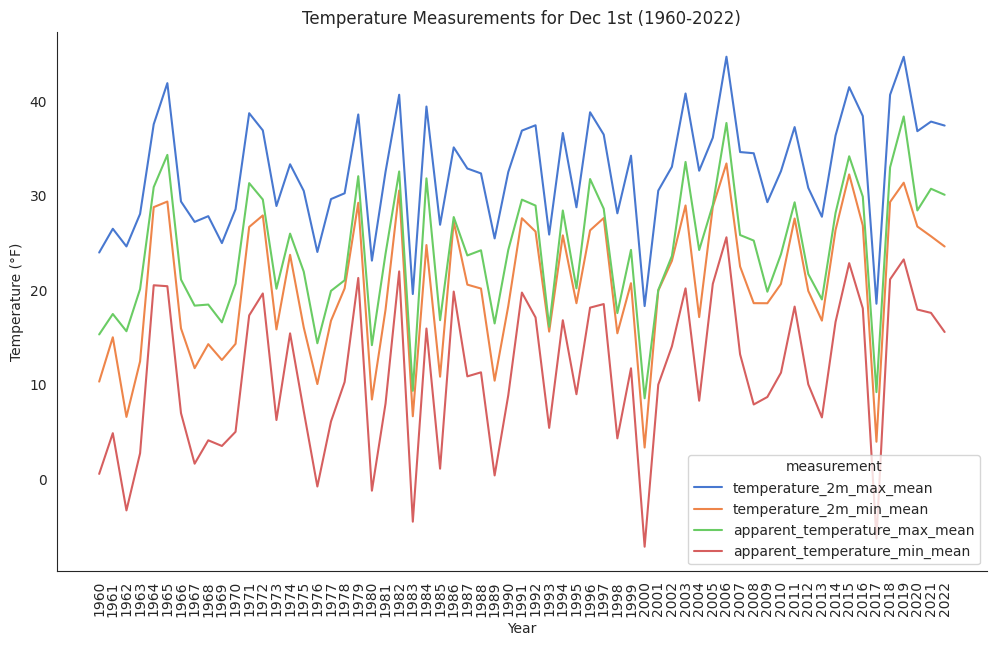

In [ ]:
plt.figure(figsize=(12, 7))

temp_measures = ['temperature_2m_max_mean', 'temperature_2m_min_mean',
                 'apparent_temperature_max_mean', 'apparent_temperature_min_mean']

sns.lineplot(data=df_melted.loc[df_melted['measurement'].isin(temp_measures)],
             x='year',
             y='value',
             hue='measurement')

plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title(f"Temperature Measurements for Dec 1st (1960-2022)")
plt.xticks(rotation=90)

sns.despine()

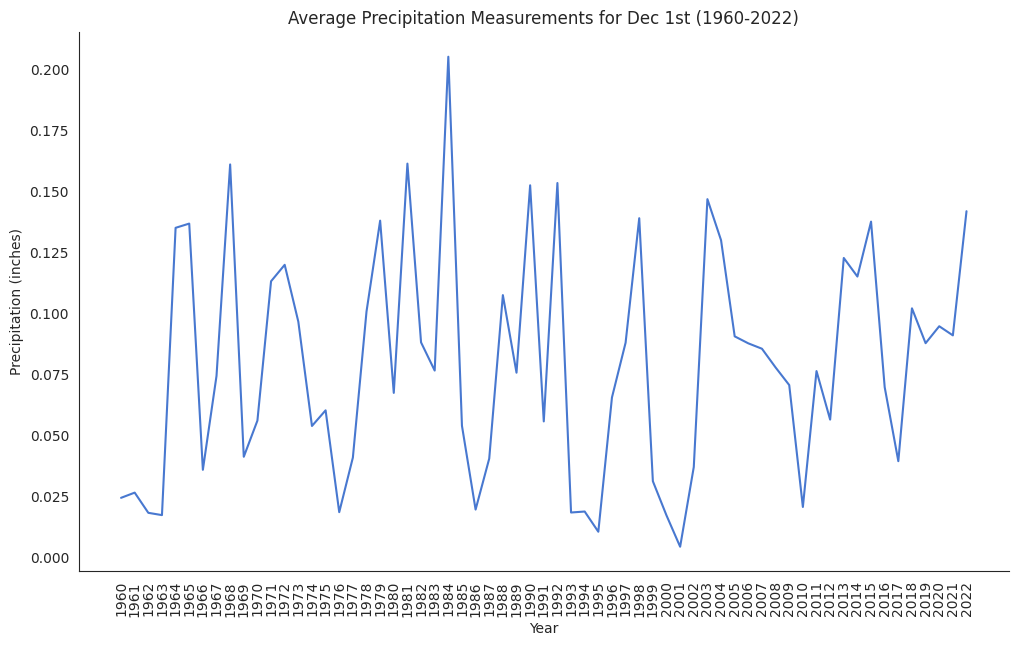

In [ ]:
plt.figure(figsize=(12, 7))

sns.lineplot(data=df_melted.loc[df_melted['measurement'] == 'precipitation_sum_mean'],
             x='year',
             y='value')

plt.xlabel("Year")
plt.ylabel("Precipitation (inches)")
plt.title(f"Average Precipitation Measurements for Dec 1st (1960-2022)")
plt.xticks(rotation=90)

sns.despine()

### Results Summary: